In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [3]:
iris = load_breast_cancer()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=42)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
svm = SVC(random_state=42, kernel="poly", C=100.0)

In [7]:
svm.fit(X_train,y_train)

SVC(C=100.0, kernel='poly', random_state=42)

In [8]:
y_pred = svm.predict(X_test)

In [9]:
Accuracy = accuracy_score(y_test,y_pred)
Precision = precision_score(y_test,y_pred, average="macro")
F1 = f1_score(y_test,y_pred, average= "macro")
Recall = recall_score(y_test,y_pred,average = "macro")

In [10]:
print(f"""
Accuracy:{Accuracy}
Precision:{Precision}
Recall:{Recall}
F1:{F1}""")


Accuracy:0.9649122807017544
Precision:0.965424739195231
Recall:0.9589947089947091
F1:0.962044983722995


In [11]:
y_probs = svm.predict_proba(X_test)[:,1]
fpr,tpr,_= roc_curve(y_test,y_probs)
plt.plot(fpr,tpr)
plt.axline((0,0),slope = 1,color = "red",linestyle = "--")

AttributeError: This 'SVC' has no attribute 'predict_proba'

In [46]:
krr = KernelRidge(kernel="linear", alpha=115.5)

In [47]:
krr.fit(X_train,y_train)

KernelRidge(alpha=115.5)

In [48]:
y_pred = krr.predict(X_test)

In [49]:
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = root_mean_squared_error(y_test,y_pred)

In [50]:
print(f"""
Mean Squared Error:{MSE}
Mean Absolute Error:{MAE}
Root Mean Square Error:{RMSE}
F1:{F1}""")


Mean Squared Error:1.0451359067619108
Mean Absolute Error:0.9756995370450608
Root Mean Square Error:1.0223188870220048
F1:1.0


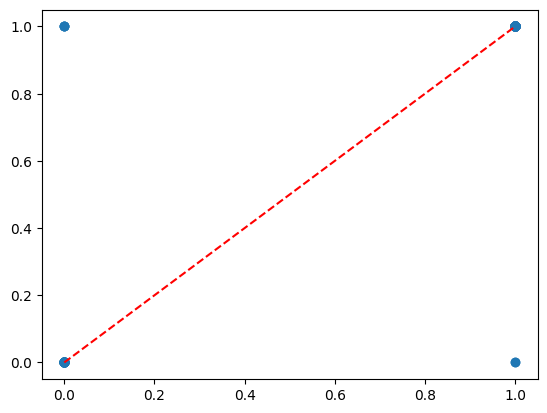

In [14]:
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],"r--")